In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
x_train.shape

(60000, 28, 28)

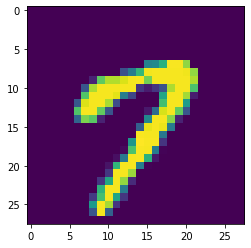

In [13]:
plt.imshow(x_train[15])

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
model = Sequential()

2022-04-29 10:54:46.470549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-29 10:54:46.470567: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-29 10:54:46.470581: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (acer-Veriton-M200-H410): /proc/driver/nvidia/version does not exist
2022-04-29 10:54:46.471368: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [34]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam',metrics='accuracy')


In [35]:
model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0117 - accuracy: 0.9976 - val_loss: 0.1904 - val_accuracy: 0.9731
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.1877 - val_accuracy: 0.9743
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.1951 - val_accuracy: 0.9741
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0108 - accuracy: 0.9974 - val_loss: 0.1823 - val_accuracy: 0.9748
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.1682 - val_accuracy: 0.9752
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.2208 - val_accuracy: 0.9703
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0134 - accuracy: 0.9974 - val_loss: 0.1830 - val_accuracy:

In [31]:
y_prob = model.predict(x_test)

In [32]:
y_pred = y_prob.argmax(axis=1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9758